In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'BMJUA_ttf'

In [2]:
analysisdata = pd.read_json('../data/getseedcorpdata.json')

In [3]:
analysisdata

,successMsg,data,success
products,success,"[{'id': 'PD00012796', 'name': '위글위글', 'logoImg...",True
similarCorps,success,"[{'corpId': 'CP00017523', 'bizNameKr': '커머스,패션...",True
mau,success,"{'recentUpdate': '2024-04-24', 'list': [{'prod...",True
customerSales,success,"{'recentUpdate': '2024-04-24', 'salesBasic': [...",True
customerType,success,"{'recentUpdate': '2024-04-24', 'salesPerson': ...",True
investment,success,"{'recentUpdate': '2022-10-04', 'lastInvestment...",True
organization,success,"{'recentUpdate': '2024-04-24', 'retireRate': 3...",True
dataSufficient,success,True,True


## MAU

In [4]:
df_mau = pd.DataFrame(analysisdata['data']['mau']['list'][0]['data'])

In [9]:
# Seaborn 패키지에서 제공하는 기본 색상 팔레트 리스트
default_palette = sns.color_palette()

print(default_palette)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (1.0, 0.4980392156862745, 0.054901960784313725), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), (0.5803921568627451, 0.403921568627451, 0.7411764705882353), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902), (0.4980392156862745, 0.4980392156862745, 0.4980392156862745), (0.7372549019607844, 0.7411764705882353, 0.13333333333333333), (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]


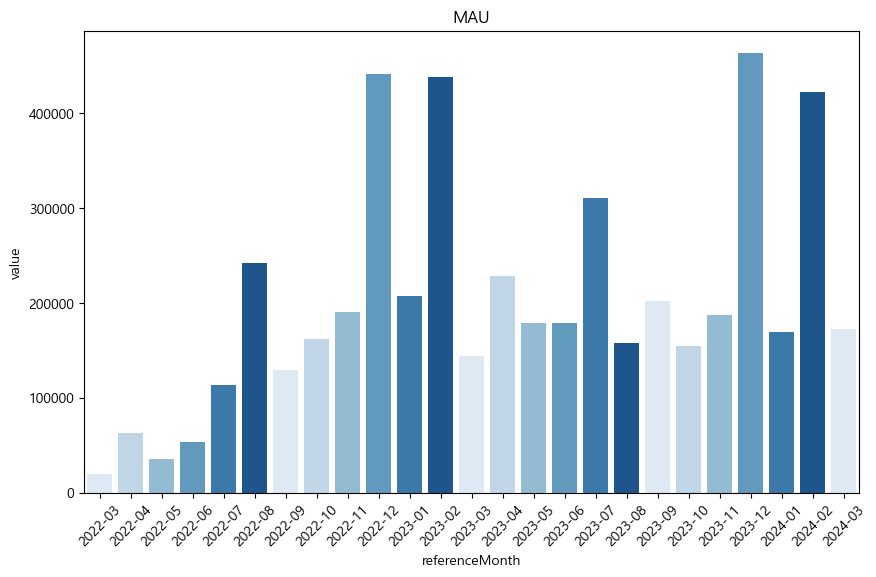

In [44]:
plt.figure(figsize=(10, 6))

palette = sns.color_palette('Blues')
sns.barplot(data=df_mau, x='referenceMonth', y='value', palette=palette)

plt.title('MAU')
plt.xticks(rotation=45)
plt.show()

## 판매실적

In [46]:
df_salesBasic = pd.DataFrame(analysisdata['data']['customerSales']['salesBasic'])

In [47]:
df_salesBasic['inCome'] = df_salesBasic['count']*df_salesBasic['unitPrice']

In [48]:
df_salesBasic[:5]

,referenceMonth,rate,count,unitPrice,inCome
0,2021-09,0.3,318,30934.3,9837107.4
1,2021-10,0.8,629,34612.2,21771073.8
2,2021-11,1.6,918,45875.7,42113892.6
3,2021-12,1.3,940,36883.1,34670114.0
4,2022-01,0.3,316,32367.2,10228035.2


### 판매 건수

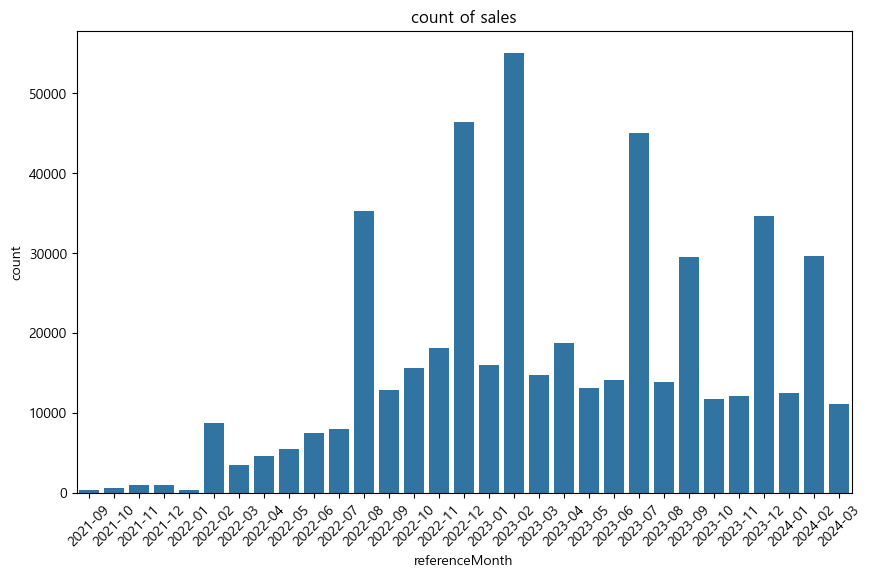

In [49]:
plt.figure(figsize=(10, 6))

sns.barplot(data=df_salesBasic, x='referenceMonth', y='count')

plt.title('count of sales')
plt.xticks(rotation=45)
plt.show()

### 평균 가격

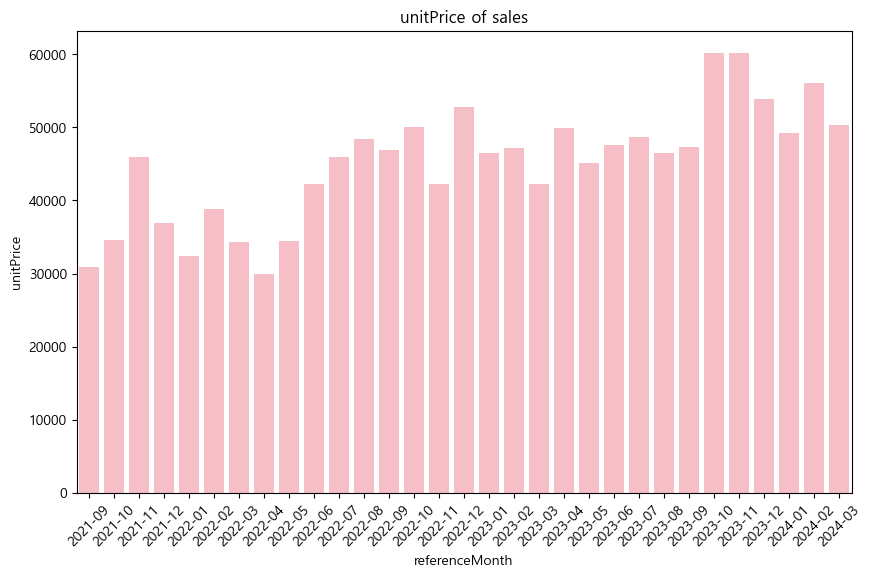

In [51]:
plt.figure(figsize=(10, 6))

sns.barplot(data=df_salesBasic, x='referenceMonth', y='unitPrice',color='lightpink')

plt.title('unitPrice of sales')
plt.xticks(rotation=45)
plt.show()

### 매출

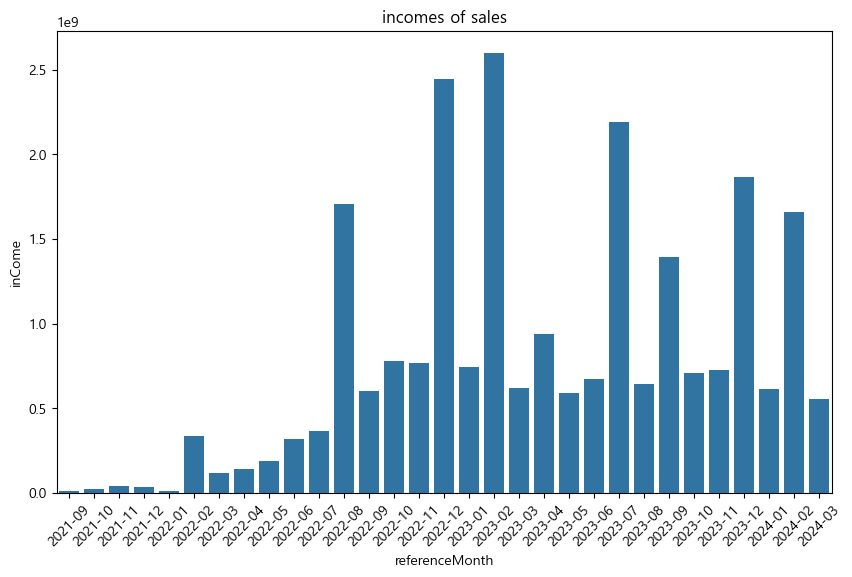

In [52]:
plt.figure(figsize=(10, 6))

sns.barplot(data=df_salesBasic, x='referenceMonth', y='inCome')

plt.title('incomes of sales')
plt.xticks(rotation=45)
plt.show()

## 재구매율

In [53]:
df_salesPeriod = pd.DataFrame(analysisdata['data']['customerSales']['salesPeriod'])

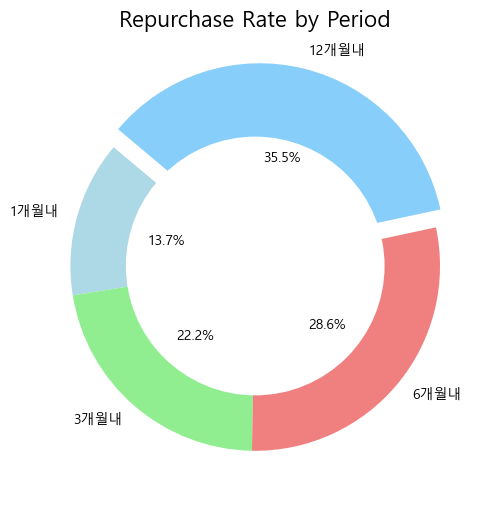

In [63]:

# 데이터
sizes = df_salesPeriod['repurchaseRate']
labels = df_salesPeriod['period']
explode = (0, 0, 0, 0.1)  # 특정 부분을 강조하기 위해 폭발 효과 사용

# 원 그래프 그리기
plt.figure(figsize=(8, 6))
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue']
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140,pctdistance=0.5, colors=colors)

# 중심에 원을 그려서 원 그래프가 원 모양을 유지하도록 함
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# 제목 추가
plt.title('Repurchase Rate by Period', fontsize=16)

# 그래프 보이기
plt.show()

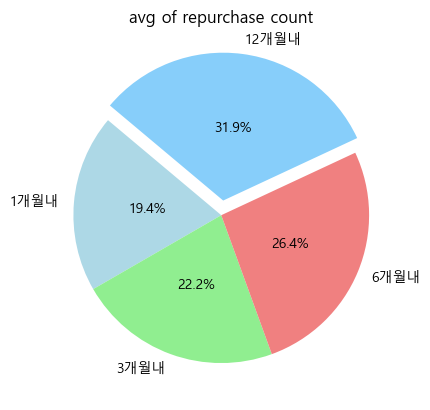

In [65]:
plt.pie(df_salesPeriod['avgPurchaseRate'], labels=df_salesPeriod['period'], autopct='%1.1f%%', startangle=140, pctdistance=0.5, colors=colors,explode=explode)
plt.title('avg of repurchase count')

plt.show()

## 소비자 유형

In [67]:
df_salesPerson = pd.DataFrame(analysisdata['data']['customerType']['salesPerson'])
df_salesFamily = pd.DataFrame(analysisdata['data']['customerType']['salesFamily'])
df_salesIncome = pd.DataFrame(analysisdata['data']['customerType']['salesIncome'])

### 성별 및 연령

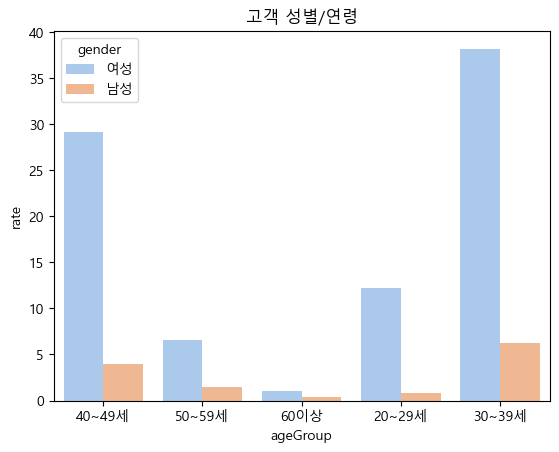

In [69]:
sns.barplot(data=df_salesPerson, x='ageGroup', y='rate', hue='gender', palette='pastel')

plt.title('고객 성별/연령')
plt.show()

### 가족구성 및 소득

In [70]:
df_salesIncome

,type,rate
0,2000만원이하,1.0
1,3000만원이하,13.6
2,4000만원이하,22.7
3,5000만원이하,22.1
4,6000만원이하,16.6
5,8000만원이하,12.9
6,1억원이하,4.8
7,1억원초과,6.3


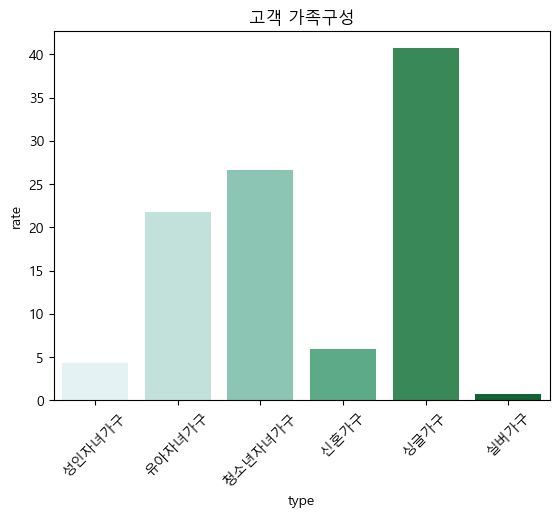

In [73]:
sns.barplot(data=df_salesFamily, x='type', y='rate', palette='BuGn')

plt.xticks(rotation=45)
plt.title('고객 가족구성')
plt.show()


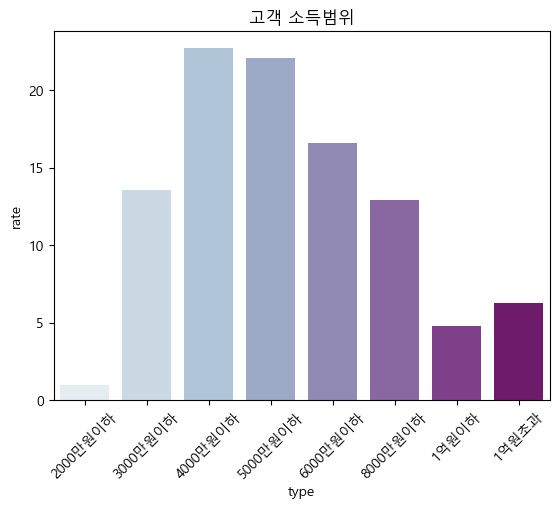

In [74]:
sns.barplot(data=df_salesIncome, x='type', y='rate',palette='BuPu')

plt.xticks(rotation=45)
plt.title('고객 소득범위')
plt.show()
